# 3. RNN

In [ ]:
import tensorflow 

import tensorflow.keras
tensorflow.keras.__version__

'2.7.0'

# RNN 사용 

의료데이터에서 성능 좋음 (최근 값이 이전 값보다 더 중요)

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32)) #10000개 단어(인덱스 0~9999) 를 32차원 벡터로 투영하기 
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # 히든레이어 3충
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층 (output 쪽) 만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

# 패딩 진행
print('시퀀스 패딩 (samples x time)') 
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #maxlen 만큼 채워주기
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [ ]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 127ms/step - loss: 0.5735 - acc: 0.6950 - val_loss: 0.4478 - val_acc: 0.8094
Epoch 2/10
157/157 [==============================] - 20s 129ms/step - loss: 0.3665 - acc: 0.8463 - val_loss: 0.4186 - val_acc: 0.8172
Epoch 3/10
157/157 [==============================] - 20s 130ms/step - loss: 0.2971 - acc: 0.8820 - val_loss: 0.3780 - val_acc: 0.8440
Epoch 4/10
157/157 [==============================] - 21s 132ms/step - loss: 0.2392 - acc: 0.9074 - val_loss: 0.3490 - val_acc: 0.8530
Epoch 5/10
157/157 [==============================] - 20s 129ms/step - loss: 0.1788 - acc: 0.9357 - val_loss: 0.3694 - val_acc: 0.8436
Epoch 6/10
157/157 [==============================] - 21s 133ms/step - loss: 0.1383 - acc: 0.9524 - val_loss: 0.3928 - val_acc: 0.8492
Epoch 7/10
157/157 [==============================] - 20s 129ms/step - loss: 0.0995 - acc: 0.9663 - val_loss: 0.4290 - val_acc: 0.8342
Epoch 8/10
157/157 [==============================] - 2

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
import matplotlib.pyplot as plt

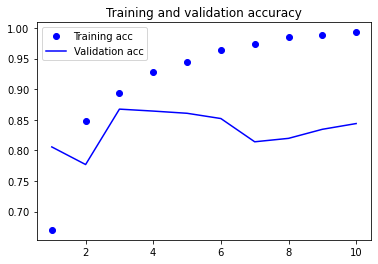

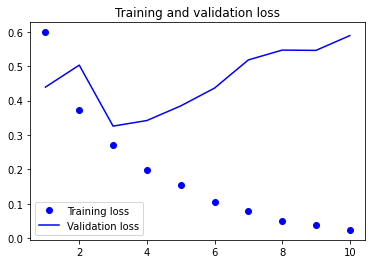

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) # 10번 학습함

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM 사용

텍스트 데이터에서 성능 우수 . 장기 문맥 의존성을 고려하기 때문

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 62s 394ms/step - loss: 0.5328 - acc: 0.7510 - val_loss: 0.4447 - val_acc: 0.8148
Epoch 2/10
157/157 [==============================] - 61s 390ms/step - loss: 0.3165 - acc: 0.8763 - val_loss: 0.3544 - val_acc: 0.8662
Epoch 3/10
157/157 [==============================] - 59s 373ms/step - loss: 0.2456 - acc: 0.9063 - val_loss: 0.3236 - val_acc: 0.8648
Epoch 4/10
157/157 [==============================] - 68s 434ms/step - loss: 0.2030 - acc: 0.9253 - val_loss: 0.3641 - val_acc: 0.8556
Epoch 5/10
157/157 [==============================] - 69s 439ms/step - loss: 0.1808 - acc: 0.9350 - val_loss: 0.3404 - val_acc: 0.8652
Epoch 6/10
157/157 [==============================] - 58s 368ms/step - loss: 0.1622 - acc: 0.9431 - val_loss: 0.3241 - val_acc: 0.8744
Epoch 7/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1486 - acc: 0.9472 - val_loss: 0.3101 - val_acc: 0.8782
Epoch 8/10
157/157 [==============================] - 5

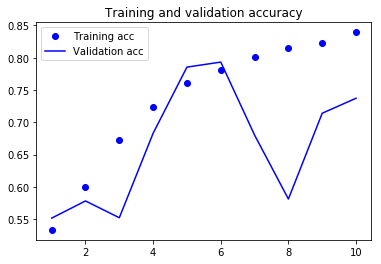

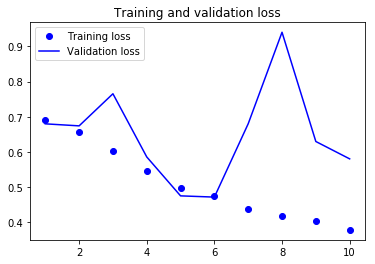

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()